**IMPORTANTE: quando viene richiesto il tempo computazionale di un programma non dare il risutato di una sola iterazione, ma far runnare il programma più volte e dare una media dei risultati ottenuti. Tempo=Tempo medio!!!**

# Ex. 1 - Ill conditioned matrices

[0.00000000e+00 1.00000000e+00 2.61803399e+00 1.39124625e+01
 1.54456460e+02 2.59288606e+03 5.76887041e+04 1.59731616e+06
 5.29377350e+07 2.04372529e+09 9.00777547e+10 4.46282252e+12
 2.45501898e+14 1.48463792e+16 9.78874203e+17 6.98824407e+19
 5.37013397e+21 7.98419411e+22 1.29437858e+23 8.59794199e+22
 2.49959502e+22 3.40432740e+22 8.50878176e+21 9.83438248e+21
 9.00524323e+21 3.54718617e+21 6.93250076e+21 7.33740997e+21
 1.67252913e+21 1.80754091e+21 1.75683198e+21 1.57908104e+21
 4.99265057e+20 5.17764448e+20 1.42749425e+21 5.19087293e+20
 7.25220217e+20 5.87422234e+20 1.16950758e+21 1.49071141e+21
 3.56139909e+20 3.58454869e+20 3.56027122e+20 3.27337843e+20
 3.93744175e+20 3.97865447e+20 3.60089192e+20 3.43961365e+20
 3.46123501e+20 3.74554862e+20]


Text(0.5, 1.0, 'Condition number (n)')

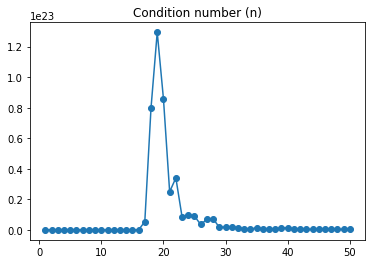

In [33]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
cond = np.zeros(N)

for n in range(1, N):
  Vand = np.vander(np.arange(n))
  cond[n] = np.linalg.cond(Vand)

print(cond)

x = np.linspace(1, N, N)

fig, ax = plt.subplots()
ax.plot(x, cond)
ax.scatter(x, cond)
plt.title("Condition number (n)")

In [35]:
import numpy as np
from scipy.linalg import hilbert

n = 5
H = np.zeros([n, n])

for i in range(0, n):
  for j in range(0, n):
    H[i,j] = 1/(i+j+1)

K_H = np.linalg.cond(H)
print(K_H)
szego_res = np.exp(3.5*n)
szego_err = K_H - szego_res
print("Szego result: " + str(szego_res))
print("Szego error: " + str(szego_err))

476607.25024259434
Szego result: 39824784.39757623
Szego error: -39348177.14733364


# Ex. 2 - Frank matrix - Answer

In [71]:
import numpy as np

N = 24
K2_F = np.zeros(N+1)
rel_err = np.zeros(N+1)

for n in range(2, N+1): 

  F = np.zeros([n, n])
  x0 = np.ones(n).astype(float)

  for i in range(0, n):
    for j in range(0, n):
      if j+1 < i:
        F[i,j] = 0
      elif j+1 == i:
        F[i, j] = float(n - i)
      else:
        F[i, j] = float(n - j)

  b = np.dot(F, x0)
  K2_F[n-2] = np.linalg.cond(F)

  x = np.linalg.solve(F, b)
  rel_err[n-2] = np.linalg.norm(x-x0)/np.linalg.norm(x0)

print(K2_F - rel_err)

[6.85410197e+00 2.75795866e+01 1.20448838e+02 6.47468303e+02
 4.20825663e+03 3.19132303e+04 2.75624616e+05 2.66657768e+06
 2.85432183e+07 3.34752088e+08 4.26736244e+09 5.87395843e+10
 8.68143416e+11 1.37121316e+13 2.30347175e+14 4.02808971e+15
 9.65242626e+16 1.87560796e+17 3.46751539e+17 5.31450757e+17
 2.20637107e+17            inf 3.44136218e+17 0.00000000e+00
 0.00000000e+00]


Text(0.5, 1.0, '')

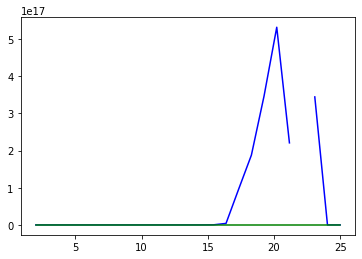

In [70]:
import matplotlib.pyplot as plt

x = np.linspace(2, N+1, N+1)

fig, ax = plt.subplots()
ax.plot(x, K2_F, c='blue')
ax.plot(x, rel_err, c='green')
plt.title("")